In [1]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data.csv")

In [3]:
print(data.head())
print(data.info())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [4]:
required_columns = ['Latitude', 'Longitude', 'City', 'Aggregate rating', 'Price range', 'Cuisines']
missing_columns = [col for col in required_columns if col not in data.columns]
if missing_columns:
    raise ValueError(f"Missing required columns: {missing_columns}")

In [5]:
central_lat = data['Latitude'].mean()
central_long = data['Longitude'].mean()

base_map = folium.Map(location=[central_lat, central_long], zoom_start=12)
marker_cluster = MarkerCluster().add_to(base_map)
for idx, row in data.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Name: {row.get('Name', 'N/A')}\nCity: {row['City']}\nRating: {row['Aggregate rating']}",
    ).add_to(marker_cluster)

base_map.save("restaurant_map.html")
print("Map saved as restaurant_map.html")

Map saved as restaurant_map.html


Restaurant count by city:
City
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: count, Length: 141, dtype: int64


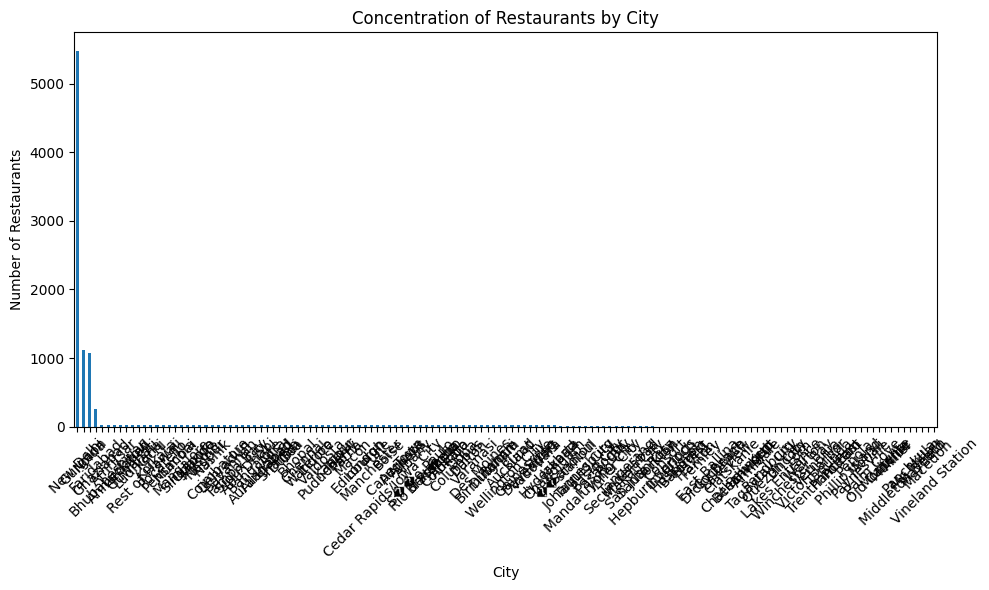

In [6]:
city_counts = data['City'].value_counts()
print("Restaurant count by city:")
print(city_counts)

city_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Concentration of Restaurants by City')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
avg_ratings = data.groupby('City')['Aggregate rating'].mean()
print("Average ratings by city:")
print(avg_ratings)

avg_price_range = data.groupby('City')['Price range'].mean()
print("Average price range by city:")
print(avg_price_range)

popular_cuisines = data.groupby('City')['Cuisines'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else "N/A")
print("Most popular cuisine by city:")
print(popular_cuisines)

correlation = data['Aggregate rating'].corr(data['Price Range'])
print(f"Correlation between ratings and price range: {correlation}")

high_rated_cities = avg_ratings[avg_ratings > 4].index.tolist()
print(f"Cities with average ratings above 4: {high_rated_cities}")

KeyError: 'Column not found: Rating'